# WSI Visualization in LazySlide

LazySlide implements different plotting functions to showcase different parts of `WSIData`.

/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


version mismatch: detected: RasterFormatV02, requested: FormatV04


/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


WSI: /Users/yzheng/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/5ac17aaa9bf8caadfba1eda04426549415fd0134/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /Users/yzheng/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/5ac17aaa9bf8caadfba1eda04426549415fd0134/GTEX-1117F-0526.zarr/GTEX-1117F-0526.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
├── Shapes
│     ├── 'annotations': GeoDataFrame shape: (14, 5) (2D shapes)
│     ├── 'dl-tissue': GeoDataFrame shape: (2, 2) (2D shapes)
│     ├── 'tiles': GeoDataFrame shape: (253, 9) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (2, 2) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (253, 2048)
      └── 'uni2_tiles': AnnData (253, 1536)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), annotations (Shapes), dl-tissue (Shapes), tiles (Shapes), tissues (Shapes)
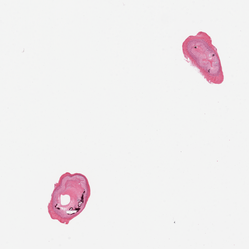

In [1]:
import lazyslide as zs

wsi = zs.datasets.gtex_artery()
wsi

## Visualize tissue

The tissues have been detected, so you will see both colored contours and id of tissues.

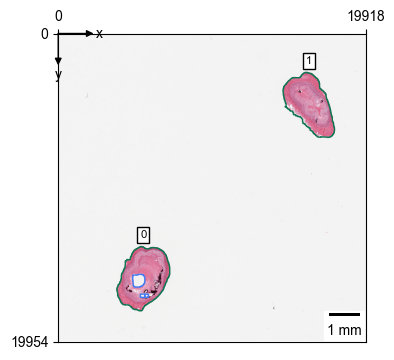

In [2]:
zs.pl.tissue(wsi)

If you want to zoom in to specific tissue, you can specify the tissue id.

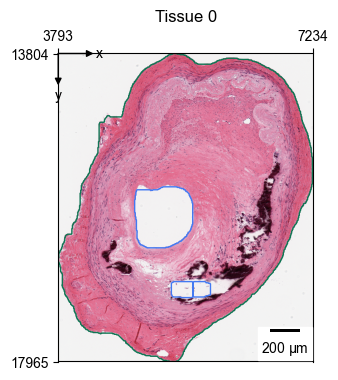

In [3]:
zs.pl.tissue(wsi, tissue_id=0)

If this is not enough, you can add a zoom view to highlight specific region.

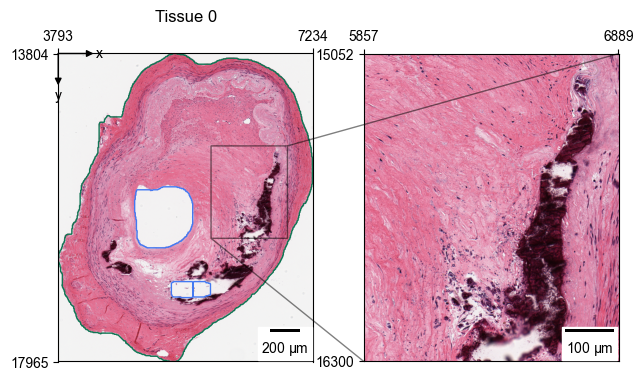

In [4]:
zs.pl.tissue(wsi, tissue_id=0, zoom=[0.6, 0.9, 0.3, 0.6])

You can also render all tissue pieces at once

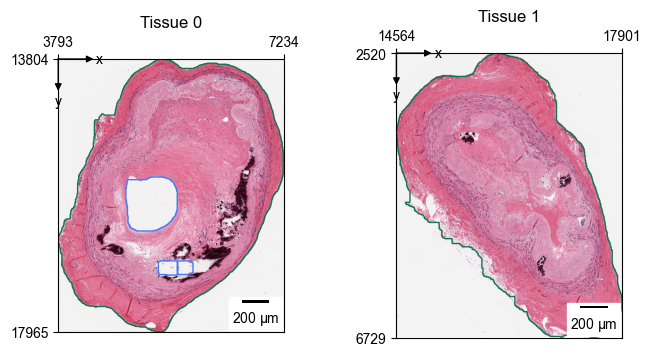

In [5]:
zs.pl.tissue(wsi, tissue_id="all")

## Visualize tiles

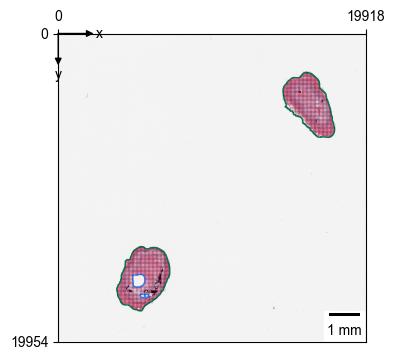

In [6]:
zs.pl.tiles(wsi)

By default, it will only display the tile grid on the tissues.

If not clear enough, you can also zoom in.

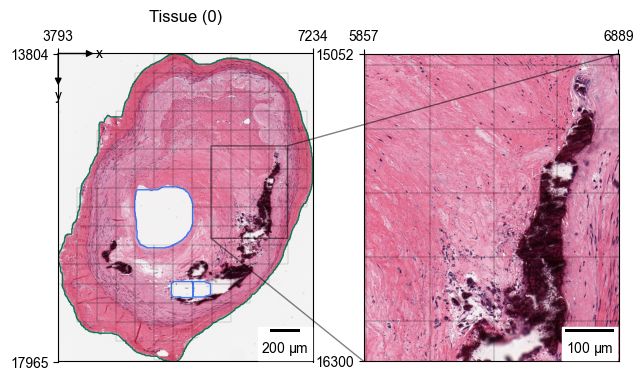

In [7]:
zs.pl.tiles(wsi, tissue_id=0, zoom=[0.6, 0.9, 0.3, 0.6])

Furthermore, we can project many features onto the tile visualization.

In [8]:
wsi["tiles"].head()

tile_id  tissue_id                                           geometry  \
0        0          0  POLYGON ((4052 16394, 4052 16653, 3793 16653, ...   
1        1          0  POLYGON ((4052 16653, 4052 16912, 3793 16912, ...   
2        2          0  POLYGON ((4311 15617, 4311 15876, 4052 15876, ...   
3        3          0  POLYGON ((4311 15876, 4311 16135, 4052 16135, ...   
4        4          0  POLYGON ((4311 16135, 4311 16394, 4052 16394, ...   

   diagnostic_quality  visual_cleanliness  focus_issue  staining_issue  \
0            0.663754            0.198376     0.480506        0.549304   
1            0.742671            0.121662     0.386750        0.444288   
2            0.791731            0.142956     0.264362        0.382962   
3            0.742936            0.149261     0.250248        0.435397   
4            0.753808            0.188161     0.238122        0.335339   

   tissue_folding_present  misc_artifacts_present  
0                0.072527                0.116421  
1                0.036697                0.074886  
2                0.278880                0.274505  
3                0.248712                0.476643  
4                0.426094                0.438732

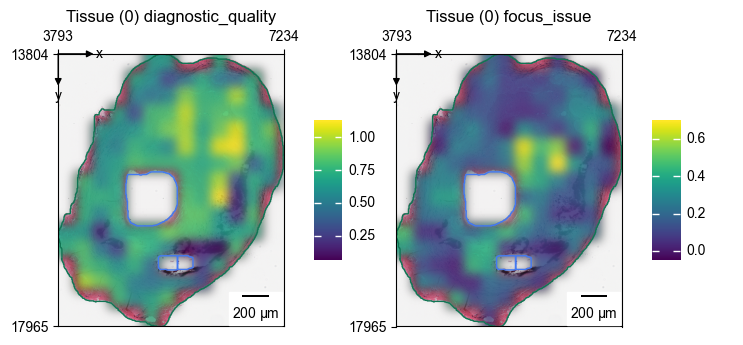

In [9]:
zs.pl.tiles(wsi, tissue_id=0, color=["diagnostic_quality", "focus_issue"], smooth=True)

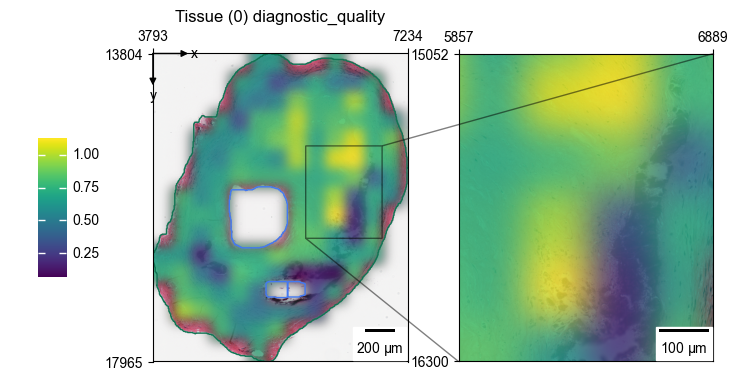

In [10]:
zs.pl.tiles(wsi, tissue_id=0, color="diagnostic_quality", zoom=[0.6, 0.9, 0.3, 0.6], smooth=True)

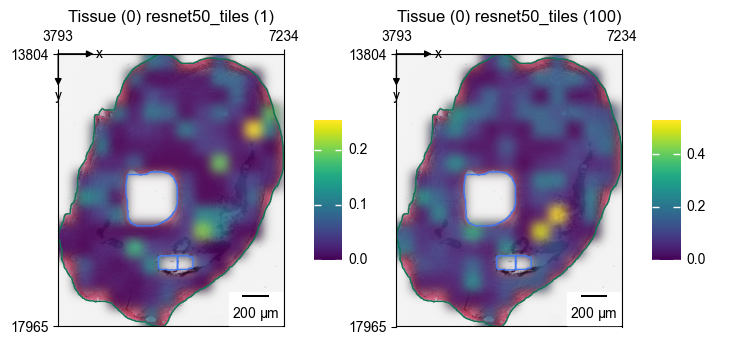

In [11]:
zs.pl.tiles(wsi, tissue_id=0, feature_key="resnet50", color=["1", "100"], smooth=True)

## Visualize annotations

If you have imported pathological annotations, they can also be visualized.

In [12]:
wsi["annotations"].head()

tissue_id                                    id  objectType       name  \
0          0  f56c25e5-ce21-4d42-bcda-b67b9fd98870  annotation  sclerosis   
1          0  c799bbe2-5a08-467a-9e5d-6376b718cee8  annotation  sclerosis   
2          0  bcc06960-003b-43f0-9e88-496579dffd34  annotation  sclerosis   
3          0  e3ba7093-e973-424a-9c77-66caa03569fb  annotation  sclerosis   
4          0  370d0dc5-f5d1-40d9-bce6-d47f63fc4cbc  annotation  sclerosis   

                                            geometry  
0  POLYGON ((4631.5 16627, 4629 16628, 4594 16628...  
1  POLYGON ((4528 16331, 4527.67 16331.17, 4527 1...  
2  POLYGON ((5598.73 17098.36, 5596 17102, 5594.8...  
3  POLYGON ((5964 17053, 5956 17055, 5954.2 17056...  
4  POLYGON ((5649 16849, 5652 16848, 5655 16848, ...

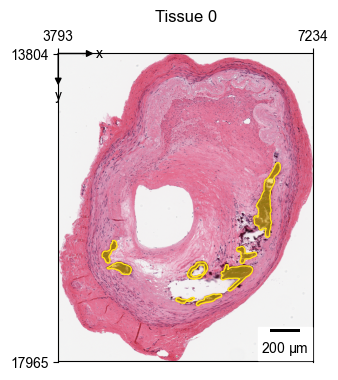

In [13]:
zs.pl.annotations(wsi, "annotations", tissue_id=0)

You can also add labels onto the image.

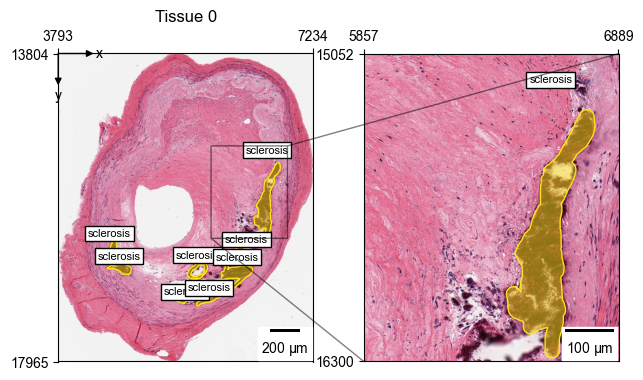

In [14]:
zs.pl.annotations(
    wsi, "annotations", tissue_id=0, label="name", zoom=[0.6, 0.9, 0.3, 0.6]
)

# Declarative visualization in LazySlide

Since `WSIData` extends from `SpatialData`, you may use `spatialdata-plot` to visualize the WSI. However, LazySlide implements an super fast and efficient plotting system to help visualize WSI from macro structures to single cells.

We start with an empty viewer, you will need to choose what to add on top of the visualization.

<Axes: >

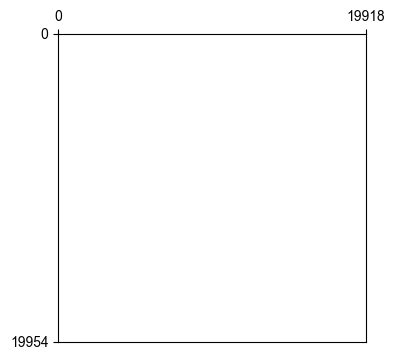

In [15]:
v = zs.pl.WSIViewer(wsi)
v.show()

In most situation, we need the slide image as the background.

<Axes: >

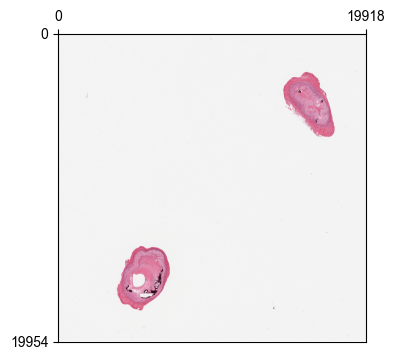

In [16]:
v.add_image()
v.show()

<Axes: >

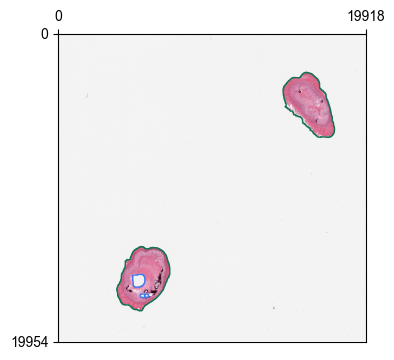

In [17]:
v.add_contours("tissues")
v.show()

<Axes: >

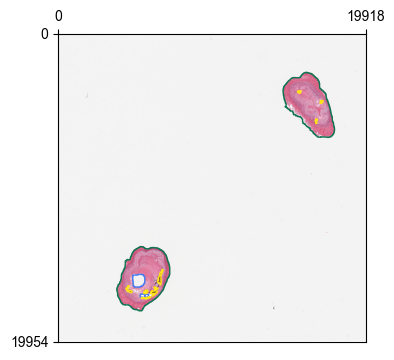

In [18]:
v.add_polygons("annotations")
v.show()

<Axes: >

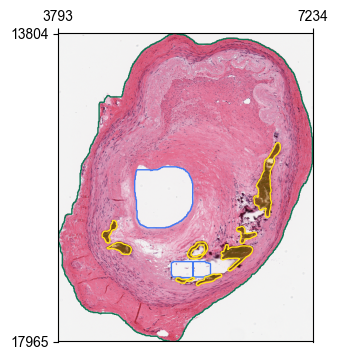

In [19]:
v.set_tissue_id(0)
v.show()

<Axes: >

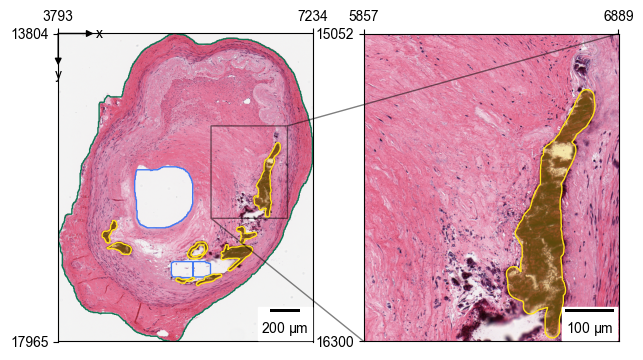

In [20]:
v.add_zoom(0.6, 0.9, 0.3, 0.6)
v.add_scalebar()
v.mark_origin()
v.show()

To summarize, you will have the following code

In [21]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_contours("tissues")
v.add_polygons("annotations")
v.set_tissue_id(0)
v.add_zoom(0.6, 0.9, 0.3, 0.6)
v.add_scalebar()
v.mark_origin()

If we don't called the `.show()` method, nothing will happen. The plotting will be lazily evaluated.

Now let's called the `.show()` to render the final image.

<Axes: >

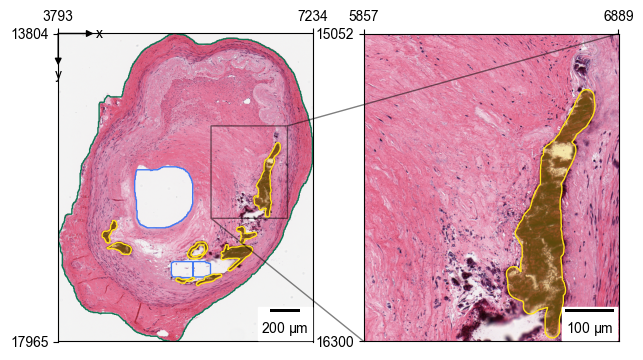

In [22]:
v.show()

You can control if an element shoud be displayed in the zoom view.

Here we disabled the display of yellow annotations in the zoom view.

<Axes: >

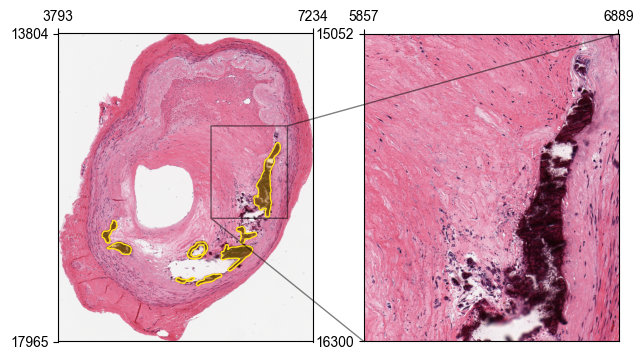

In [23]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("annotations", in_zoom=False)
v.set_tissue_id(0)
v.add_zoom(0.6, 0.9, 0.3, 0.6)
v.show()

## Efficient debugging of visualization

The progressive adding components on top of the images is cool, it gives you finer control on what to visualize.

However, it's not efficient to debug, once you add a component, you cannot delete it.

If you have a large image and you create a new viewer everytime when you want to modify some tiny details, you waste your time on re-computing the image rendering process.

Luckily, we have a solution for this. When you add a component, simply set `cache=False`, and it will only be rendered in the next rendering.

<Axes: >

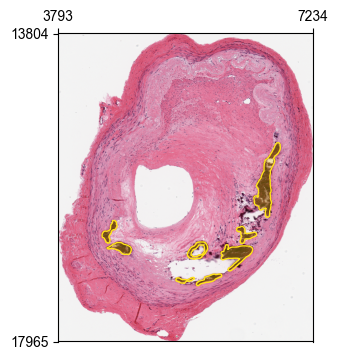

In [24]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("annotations", cache=False)
v.set_tissue_id(0)
v.show()

If we called the `.show()` again, the annotation will disappered.

<Axes: >

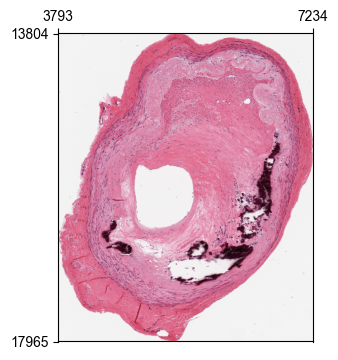

In [25]:
v.show()

In this way, you can easily change color without recomputing the image rendering process.

You may not notice the difference in this example, but if you have a huge WSI. This can make significant difference.

<Axes: >

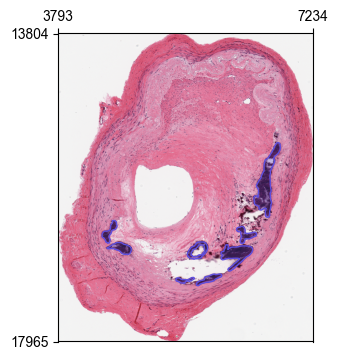

In [26]:
v.add_polygons("annotations", color="#604FDD", cache=False)
v.show()